In [3]:
import numpy as np
import file_parser
import os
import pandas as pd
import matplotlib.pyplot as plt
import multiprocessing
from multiprocessing import Pool, cpu_count


In [4]:
def process_symbol(symbol_and_df):
    symbol, df = symbol_and_df

    print("Symbol: ", symbol)
    
    # Create a new dataframe with ordered_column_0_values
    new_df = pd.DataFrame({'Column_0': ordered_column_0_values})
    
    # Merge with the original dataframe
    merged_df = pd.merge(new_df, df, on='Column_0', how='left')
    
    # Label the known and estimated values
    # Create a boolean column 'is_known' where True indicates known values and False indicates estimated ones
    merged_df['is_known'] = ~merged_df['Column_5'].isna()
    
    # Perform linear interpolation
    merged_df.interpolate(method='linear', inplace=True, limit_direction='both')
    
    return (symbol, merged_df)

In [5]:
def plot_price(symbol, df_dict):
    """
    Plot the price for a given symbol from the dictionary.

    Parameters:
    - symbol (str): The stock symbol (e.g., "AAPL", "AMZN", etc.)
    - df_dict (dict): Dictionary containing dataframes with stock data.

    Returns:
    - matplotlib figure
    """
    # Retrieve the dataframe for the given symbol
    df = df_dict.get(symbol)
    
    if df is None:
        print(f"No data available for symbol: {symbol}")
        return
    
    # Extract data
    time = df['Column_0']
    price = df['Column_5']

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(time, price, label=symbol, color='blue')
    
    ax.set_title(f"Price vs Time for {symbol}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Price")
    ax.legend()

    plt.tight_layout()
    plt.show()
    return fig

In [ ]:
# Read all symbols from the all_tickers file
with open('all_tickers', 'r') as f:
    all_symbols = [line.strip() for line in f.read().splitlines()]


# Dictionary to store dataframes for each ticker
df_dict = {}

# Path to the Sample_Data directory
base_dir = "Sample_Data"

for symbol in all_symbols:
    # Get all .txt files for the current symbol
    files = [f for f in os.listdir(os.path.join(base_dir, symbol)) if f.endswith('.txt')]
    
    # Sort files based on the timestamp
    files_sorted = sorted(files, key=lambda x: x.split('_')[-1])

    # print(files_sorted)
    # break
    
    # Read and concatenate dataframes
    df_list = [pd.read_csv(os.path.join(base_dir, symbol, f)) for f in files_sorted]

    # ge number of columns in each dataframe
    num_columns = df_list[0].shape[1]

    # add column names to each dataframe [Column_0, Column_1, Column_2, ...]
    for i in range(len(df_list)):
        df_list[i].columns = ['Column_' + str(j) for j in range(num_columns)]

    # add an index column to each dataframe


    # print shape of each dataframe
    # df_concatenated = pd.concat(df_list, ignore_index=True)
    # concantenate all rows
    df_concatenated = pd.concat(df_list, axis=0, ignore_index=False)

    # Convert 'Column_0' to datetime
    df_concatenated['Column_0'] = pd.to_datetime(df_concatenated['Column_0'])
    df_concatenated['Column_1'] = pd.to_datetime(df_concatenated['Column_1'])

    # print(df_concatenated.iloc[:, 5].head())
    
    # Store the concatenated dataframe in the dictionary
    df_dict[symbol] = df_concatenated

print("Created all dataframes from files....")
# Extract 'Column_0' from each dataframe and concatenate them
all_column_0_values = pd.concat([df['Column_0'] for df in df_dict.values()])

print("Concatenated all values... in Column_0")

# Convert to set to remove duplicates
unique_column_0_values = set(all_column_0_values)

# Sort the set
sorted_column_0_values = sorted(unique_column_0_values)

# Convert it to an ordered set (which is essentially a list in Python, since Python doesn't have a built-in ordered set)
ordered_column_0_values = list(sorted_column_0_values)

print("Have the ordered set of timestamps")

# Updated df_dict
updated_df_dict = {}

# Using a pool to process the symbols in parallel
with multiprocessing.Pool() as pool:
    results = pool.map(process_symbol, df_dict.items())

updated_df_dict = dict(results) 


/var/folders/nm/zdng4t6j7msc8nd7phngmnr80000gn/T/ipykernel_10244/3323717442.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_concatenated = pd.concat(df_list, axis=0, ignore_index=False)
/var/folders/nm/zdng4t6j7msc8nd7phngmnr80000gn/T/ipykernel_10244/3323717442.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_concatenated = pd.concat(df_list, axis=0, ignore_index=False)


Created all dataframes from files....
Concatenated all values... in Column_0
Have the ordered set of timestamps


Process SpawnPoolWorker-1:
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/pool.py", line 114, in worker
    task = get()
           ^^^^^
  File "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'process_symbol' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2:
Traceback (most recent call last):
  File "

Process SpawnPoolWorker-10:
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/pool.py", line 114, in worker
    task = get()
           ^^^^^
  File "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'process_symbol' on <module '__main__' (built-in)>
Process SpawnPoolWorker-11:
Traceback (most recent call last):
  File

Process SpawnPoolWorker-20:
Traceback (most recent call last):
Process SpawnPoolWorker-21:
  File "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/pool.py", line 114, in worker
    task = get()
           ^^^^^
  File "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'process_symbol' on <module '__main__' (built-in)>
Traceback (most recent call last):
  File

In [ ]:
fig = plot_price("AAPL", updated_df_dict)
fig.show()

In [ ]:
# calculating correlation matrix in a sliding window fashion

# Define the window size and overlap
window_size = 50000000
overlap = 0.5
step_size = int(window_size * (1 - overlap))

# Get a list of series for Column_5 for all symbols
series_list = [df['Column_5'] for df in updated_df_dict.values()]

# Assuming all series are of the same length
series_length = len(series_list[0])

# Function to compute correlation matrices for a set of windows
def compute_correlation(start):
    end = start + window_size
    sub_series = [s[start:end] for s in series_list]
    temp_df = pd.concat(sub_series, axis=1)
    temp_df.columns = updated_df_dict.keys()
    return temp_df.corr().values

# Create a list of start indices for each sliding window with overlap
start_indices = list(range(0, series_length - window_size + 1, step_size))

# Use a Pool of workers to compute the correlation matrices in parallel
with Pool(cpu_count()) as p:
    correlation_matrices = p.map(compute_correlation, start_indices)

# Convert the list of matrices to a numpy array
correlation_array = np.array(correlation_matrices)

In [ ]:
def plot_correlation_evolution(correlation_array, dim2, dim3):
    """
    Plot the evolution of correlation for fixed dim2 and dim3 over the first dimension of correlation_array.
    
    Parameters:
    - correlation_array: 3D numpy array
    - dim2, dim3: indices of symbols in the correlation matrix

    Returns:
    - fig: matplotlib figure object
    """
    
    # Extract data for the given dimensions
    correlation_evolution = correlation_array[:, dim2, dim3]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(correlation_evolution, '-o', label=f"Correlation of {list(updated_df_dict.keys())[dim2]} and {list(updated_df_dict.keys())[dim3]}")
    ax.set_xlabel("Time (Matrix Index)")
    ax.set_ylabel("Correlation")
    ax.set_title(f"Correlation Evolution of {list(updated_df_dict.keys())[dim2]} and {list(updated_df_dict.keys())[dim3]}")
    ax.legend()
    ax.grid(True)
    
    return fig


In [ ]:
# Use the function
symbol1_idx = 3  # Example index for AAPL (or whatever symbol is at index 0)
symbol2_idx = 5  # Example index for AMZN (or whatever symbol is at index 1)
fig = plot_correlation_evolution(correlation_array, symbol1_idx, symbol2_idx)
fig.show()

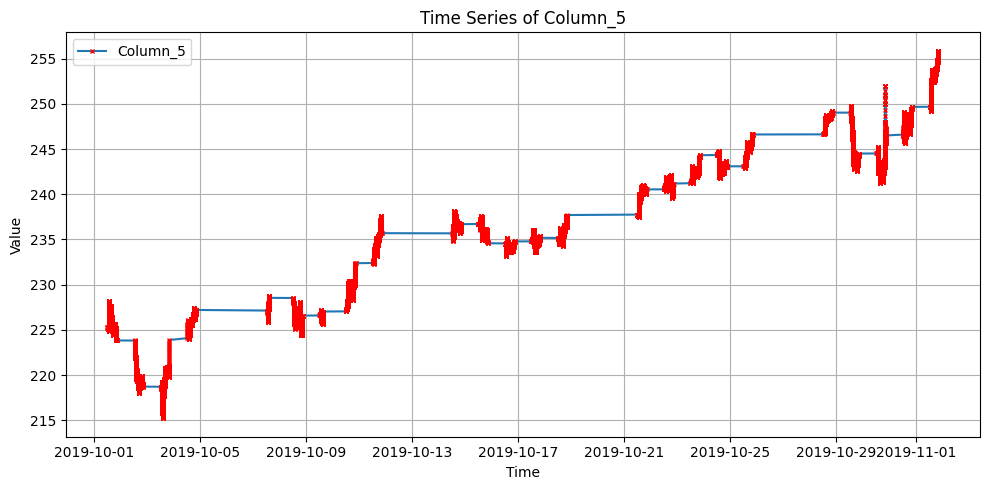

In [34]:
# Matplotlib plotting
plt.figure(figsize=(10, 5))
plt.plot(merged_df['Column_0'], merged_df['Column_5'], marker='x', label='Column_5', markersize = 3, markerfacecolor='red', markeredgecolor='red')
plt.title('Time Series of Column_5')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()